This construction was taken from https://kepler-mapper.scikit-tda.org/generated/gallery/plot_digits.html

In [8]:
%matplotlib inline
import kmapper as km
from kmapper import jupyter
import matplotlib.pyplot as plt


Breast Cancer
================



This example generates a Mapper built from the `Wisconsin Breast Cancer Dataset <https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>`_.

`Visualization of the breast cancer mapper <../../_static/breast-cancer.html>`_


The reasoning behind the choice of lenses in the demonstration above is:

- **For lens1:** Lenses that make biological sense; in other words, lenses that highlight special features in the data, that I know about. 
- **For lens2:** Lenses that disperse the data, as opposed to clustering many points together.

In the case of this particualr data, using an anomaly score (in this case calculated using the IsolationForest from sklearn) makes biological sense since cancer cells are anomalous. For the second lens, we use the $l^2$ norm.

For an interactive exploration of lens for the breast cancer, see the `Choosing a lens notebook <../../notebooks/Cancer-demo.html>`_.



![](../../../examples/images/breast-cancer.png)



In [11]:
import sys
import pandas as pd
import numpy as np
import kmapper as km
import sklearn
from sklearn import ensemble

In [15]:
# Let us read the data from the Wisconsin Breast Cancer Dataset.
#It can be found in here: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
df = pd.read_csv("data\\breast-cancer.csv")
feature_names = [c for c in df.columns if c not in ["id", "diagnosis"]]
df["diagnosis"] = df["diagnosis"].apply(lambda x: 1 if x == "M" else 0)
X = np.array(df[feature_names].fillna(0))  # quick and dirty imputation
y = np.array(df["diagnosis"])

print(sum(y))
print(len(y))

212
569


In [17]:
# We create a custom 1-D lens with Isolation Forest
model = ensemble.IsolationForest(random_state=1729)
model.fit(X)
lens1 = model.decision_function(X).reshape((X.shape[0], 1))

# We create another 1-D lens with L2-norm
mapper = km.KeplerMapper(verbose=0)
lens2 = mapper.fit_transform(X, projection="l2norm")

# Combine both lenses to create a 2-D [Isolation Forest, L^2-Norm] lens
lens = np.c_[lens1, lens2]

# Create the simplicial complex
graph = mapper.map(lens,
                   X,
                   cover=km.Cover(n_cubes=15, perc_overlap=0.4)
                   ,clusterer=sklearn.cluster.KMeans(n_clusters=2,
                                                    random_state=1618033)
                   )

# Visualization
mapper.visualize(graph,
                 path_html="breast-cancer.html",
                 title="Wisconsin Breast Cancer Dataset",
                 custom_tooltips=y)


jupyter.display(path_html="breast-cancer.html")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


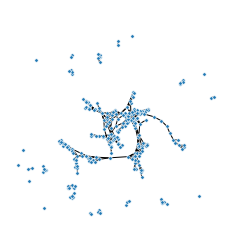

In [18]:
#We can also visualize the Mapper graph in the matplotlib as below:
import matplotlib.pyplot as plt
km.draw_matplotlib(graph)
plt.show()